In [1]:
from scipy import stats                                         #for distribution
import numpy as np                                              #for random choice and linspace
import polars as pl                                             #for dataframe
import matplotlib.pyplot as plt                                 #for plotting
from statsmodels.stats.weightstats import ztest as ztesting     #for z_test


                                                        Testing for means


normally distributing ages in a school and a class in that school


In [2]:
school_ages = stats.norm.rvs(loc=30, size=2000,scale=10)

In [3]:
# sample 1
s1 = np.random.choice(school_ages, 90)
class_ages_1=s1+(32-s1.mean())

In [4]:
# sample 2
s2 = np.random.choice(school_ages, 90)
class_ages_2=s1+(30-s2.mean())

Text(0, 0.5, 'students')

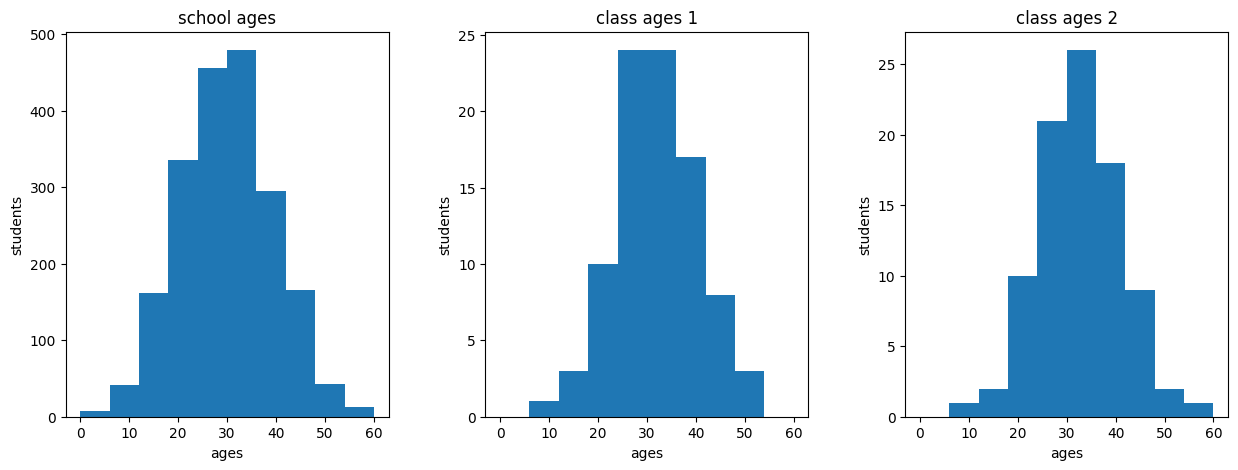

In [5]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
plt.subplots_adjust(wspace=0.3)
ax[0].hist(school_ages,range=(0,60))
ax[0].set_title("school ages")
ax[0].set_xlabel("ages")
ax[0].set_ylabel("students")
ax[1].hist(class_ages_1,range=(0,60))
ax[1].set_title("class ages 1")
ax[1].set_xlabel("ages")
ax[1].set_ylabel("students")
ax[2].hist(class_ages_2,range=(0,60))
ax[2].set_title("class ages 2")
ax[2].set_xlabel("ages")
ax[2].set_ylabel("students")


In [6]:
print(f"school_ages_mean:{school_ages.mean()} class_ages_1_mean:{class_ages_1.mean()} class_ages_2_mean:{class_ages_2.mean()}")

school_ages_mean:30.009506504421683 class_ages_1_mean:31.999999999999996 class_ages_2_mean:32.63093704435335


                                                    one sample z-test


 finding confindience interval for sample mean

In [7]:
ci1,ci2=stats.norm.interval(confidence=0.95,loc=class_ages_1.mean(),scale=stats.sem(class_ages_1))
print(ci1,ci2)

30.292199427435428 33.707800572564565


In [8]:
# one-sided__larger  Ho==>mu1-mu2=0 (no diff b/w means)   Ha==> mu1-mu2>value  class mean is bigger than school mean
class_ztest_1, class_p_value_1 = ztesting(
    x1=class_ages_1, x2=None, value=school_ages.mean(), alternative='larger')
# one-sided__smaller Ho==> mu1-mu2=0 (no diff b/w means) Ha==> mu1-mu2<value  class mean is smaller than school mean
class_ztest_2, class_p_value_2 = ztesting(
    x1=class_ages_1, x2=None, value=school_ages.mean(), alternative='smaller')
# two_sided          Ho==> mu1-mu2=0 (no diff b/w means) Ha==> mu1-mu2!=0   class mean is either higher or lower than school mean
class_ztest_3, class_p_value_3 = ztesting(
    x1=class_ages_1, x2=None, value=school_ages.mean(), alternative="two-sided")

In [9]:
print(f"      class_ztest_1:{class_ztest_1} class_p_value_1 :{class_p_value_1} \n\
      class_ztest_2:{class_ztest_2} class_p_value_2 :{class_p_value_2} \n\
      class_ztest_3:{class_ztest_3} class_p_value_3 :{class_p_value_3}")

      class_ztest_1:2.284397619644917 class_p_value_1 :0.011174086671854254 
      class_ztest_2:2.284397619644917 class_p_value_2 :0.9888259133281457 
      class_ztest_3:2.284397619644917 class_p_value_3 :0.02234817334370851


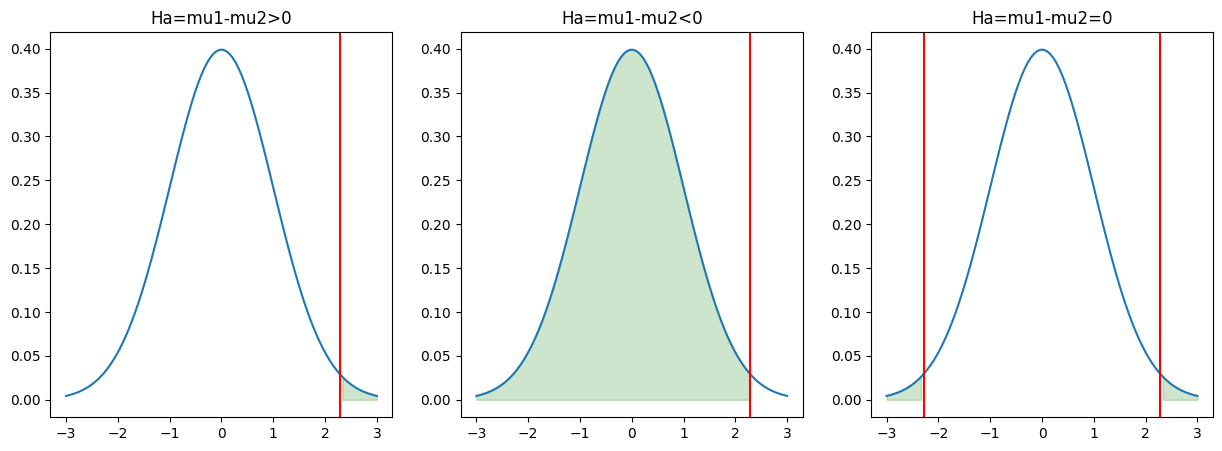

In [10]:
z1 = class_ztest_1
fig,ax=plt.subplots(1,3,figsize=(15,5))
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x, loc=0, scale=1)
ax[0].plot(x, y)
ax[0].axvline(x=z1, color='red')
ax[0].fill_between(x, 0, y, where=(x > z1), alpha=0.2,color='green')
ax[0].set_title("Ha=mu1-mu2>0")
ax[1].plot(x, y)
ax[1].axvline(x=z1, color='red')
ax[1].fill_between(x, 0, y, where=(x < z1), alpha=0.2,color='green')
ax[1].set_title("Ha=mu1-mu2<0")
ax[2].plot(x, y)
ax[2].axvline(x=z1, color='red')
ax[2].axvline(x=-z1, color='red')
ax[2].fill_between(x, 0, y, where=(x > np.abs(z1)), alpha=0.2,color='green')
ax[2].fill_between(x, 0, y, where=(x <(-np.abs(z1))), alpha=0.2,color='green')
ax[2].set_title("Ha=mu1-mu2=0")
plt.show()


In [ ]:
b=

In [11]:
#95% significance
if (class_p_value_1 < 0.05):
    print("reject null hypothesis 1: therefore greater chance that class 1 mean will be greater than class 2 mean")
else:
    print("can't reject null hypothesis 1: therefore lesser chance that class 1 mean will be greater than class 2 mean")
if (class_p_value_2 < 0.05):
    print("reject null hypothesis 2: therefore greater chance that class 1 mean will be smaller than class 2 mean")
else:
    print("can't reject null hypothesis 2: therefore lesser chance that class 1 mean will be smaller than class 2 mean")
if (class_p_value_3 < 0.05):
    print("reject null hypothesis 3: therefore greater chance that class 1 mean will be either greater or smaller than class 2 mean")
else:
    print("can't reject null hypothesis 3: therefore lesser chance that class 1 mean will be either greater or smaller than class 2 mean")


reject null hypothesis 1: therefore greater chance that class 1 mean will be greater than class 2 mean
can't reject null hypothesis 2: therefore lesser chance that class 1 mean will be smaller than class 2 mean
reject null hypothesis 3: therefore greater chance that class 1 mean will be either greater or smaller than class 2 mean


two-sample-z test


In [12]:
# one-sided__larger
class_ztest_1, class_p_value_1 = ztesting(
    x1=class_ages_1, x2=class_ages_2, value=0, alternative='larger')
# one-sided__smaller
class_ztest_2, class_p_value_2 = ztesting(
    x1=class_ages_1, x2=class_ages_2, value=0, alternative='smaller')
# two_sided
class_ztest_3, class_p_value_3 = ztesting(
    x1=class_ages_1, x2=class_ages_2, value=0, alternative="two-sided")


In [13]:
print(f"      class_ztest_1:{class_ztest_1} class_p_value:{class_p_value_1} \n\
      class_ztest_2:{class_ztest_2} class_p_value_2 :{class_p_value_2} \n\
      class_ztest_3:{class_ztest_3} class_p_value_3 :{class_p_value_3}")


      class_ztest_1:-0.512014152437074 class_p_value:0.6956794476185619 
      class_ztest_2:-0.512014152437074 class_p_value_2 :0.3043205523814381 
      class_ztest_3:-0.512014152437074 class_p_value_3 :0.6086411047628763


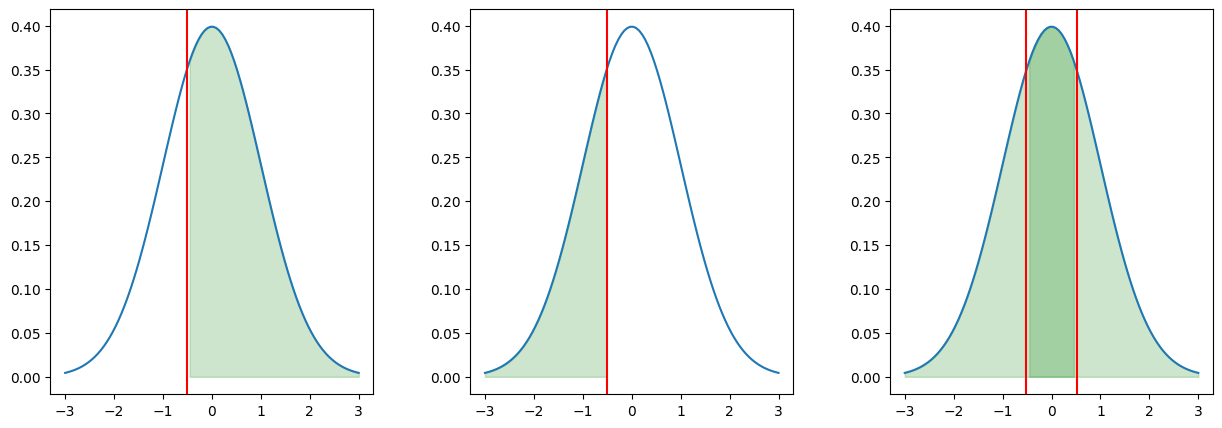

In [14]:
z1 = class_ztest_1
fig,ax=plt.subplots(1,3,figsize=(15,5))
plt.subplots_adjust(wspace=0.3)
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x, loc=0, scale=1)
ax[0].plot(x, y)
ax[0].axvline(x=z1, color='red')
ax[0].fill_between(x, 0, y, where=(x > z1), alpha=0.2,color='green')
ax[1].plot(x, y)
ax[1].axvline(x=z1, color='red')
ax[1].fill_between(x, 0, y, where=(x < z1), alpha=0.2,color='green')
ax[2].plot(x, y)
ax[2].axvline(x=z1, color='red')
ax[2].axvline(x=-z1, color='red')
condition=((x>z1) | ( x<-z1))
ax[2].fill_between(x, 0, y, where=(x > z1), alpha=0.2,color='green')
ax[2].fill_between(x, 0, y, where=(x < -z1), alpha=0.2,color='green')
plt.show()

In [15]:
#95% significance
if (class_p_value_1 < 0.05):
    print("reject null hypothesis 1: therefore greater chance that class 1 mean will be greater than class 2 mean")
else:
    print("can't reject null hypothesis 1: therefore lesser chance that class 1 mean will be greater than class 2 mean")
if (class_p_value_2 < 0.05):
    print("reject null hypothesis 2: therefore greater chance that class 1 mean will be smaller than class 2 mean")
else:
    print("can't reject null hypothesis 2: therefore lesser chance that class 1 mean will be smaller than class 2 mean")
if (class_p_value_3 < 0.05):
    print("reject null hypothesis 3: therefore greater chance that class 1 mean will be either greater or smaller than class 2 mean")
else:
    print("can't reject null hypothesis 3: therefore lesser chance that class 1 mean will be either greater or smaller than class 2 mean")

can't reject null hypothesis 1: therefore lesser chance that class 1 mean will be greater than class 2 mean
can't reject null hypothesis 2: therefore lesser chance that class 1 mean will be smaller than class 2 mean
can't reject null hypothesis 3: therefore lesser chance that class 1 mean will be either greater or smaller than class 2 mean


importing data

In [16]:
df=pl.read_csv("/workspaces/ravikumar/statistics/testing/Daily Gold Price - Sheet1.csv")
df

Date,Open,High,Low,Close,Adj Close,Volume
str,str,str,str,str,str,str
"""Mar 29, 2023""","""1,966.10""","""1,966.10""","""1,966.10""","""1,966.10""","""1,966.10""","""21"""
"""Mar 28, 2023""","""1,972.40""","""1,972.40""","""1,972.40""","""1,972.40""","""1,972.40""","""21"""
"""Mar 27, 2023""","""1,957.20""","""1,957.20""","""1,952.40""","""1,952.40""","""1,952.40""","""877"""
"""Mar 24, 2023""","""1,991.70""","""1,995.40""","""1,982.10""","""1,982.10""","""1,982.10""","""19"""
"""Mar 23, 2023""","""1,990.50""","""1,994.60""","""1,990.50""","""1,993.80""","""1,993.80""","""33"""
"""Mar 22, 2023""","""1,946.80""","""1,974.00""","""1,946.80""","""1,946.80""","""1,946.80""","""50"""
"""Mar 21, 2023""","""1,973.80""","""1,973.80""","""1,938.00""","""1,938.00""","""1,938.00""","""47"""
"""Mar 20, 2023""","""1,988.30""","""2,003.90""","""1,968.90""","""1,979.20""","""1,979.20""","""389"""
"""Mar 17, 2023""","""1,946.00""","""1,985.10""","""1,946.00""","""1,969.80""","""1,969.80""","""82"""


cleaning data

In [17]:
a=df['Close'].str.replace_all(pattern='[,]',value='')
b=a.cast(pl.Float32,strict=False)
data=b.filter(b>1600)
data

Close
f32
1966.099976
1972.400024
1952.400024
1982.099976
1993.800049
1946.800049
1938.0
1979.199951
1969.800049


In [18]:
s1=np.random.choice(data,50)
sample1=s1+(1850-s1.mean())
sample2=np.random.choice(data,50)
sample2=s2+(1800-s2.mean())

In [19]:
print(f"gold_mean:{data.mean()} sample1_mean:{sample1.mean()} sample2_mean:{sample2.mean()}")

gold_mean:1811.2624014920966 sample1_mean:1850.0003662109375 sample2_mean:1800.0


Text(0.5, 1.0, 'sample 2')

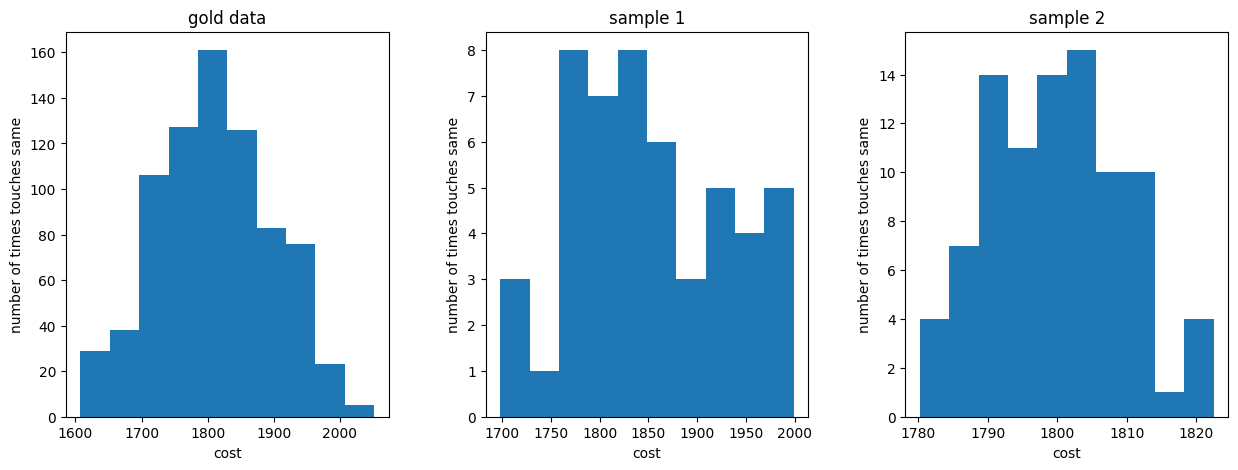

In [20]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
plt.subplots_adjust(wspace=0.3)
ax[0].hist(data)
ax[0].set_xlabel("cost")
ax[0].set_ylabel("number of times touches same")
ax[0].set_title("gold data")
ax[1].hist(sample1)
ax[1].set_xlabel("cost")
ax[1].set_ylabel("number of times touches same")
ax[1].set_title("sample 1")
ax[2].hist(sample2)
ax[2].set_xlabel("cost")
ax[2].set_ylabel("number of times touches same")
ax[2].set_title("sample 2")

In [21]:
# one-sided__larger  Ho==>mu1-mu2=0 (no diff b/w means)   Ha==> mu1-mu2>value  sample mean is bigger than data mean
z1,p1 = ztesting(
    x1=sample1, x2=None, value=data.mean(), alternative='larger')
# one-sided__smaller Ho==> mu1-mu2=0 (no diff b/w means) Ha==> mu1-mu2<value  sample mean is smaller than data mean
z2,p2 = ztesting(
    x1=sample1, x2=None, value=data.mean(), alternative='smaller')
# two_sided          Ho==> mu1-mu2=0 (no diff b/w means) Ha==> mu1-mu2!=0   sample mean is either higher or lower than data mean
z3,p3 = ztesting(
    x1=sample1, x2=None, value=data.mean(), alternative="two-sided")

In [22]:
print(f"      z1:{z1} p1:{p1} \n\
      z2:{z2} p2 :{p2} \n\
      z3:{z3} p3 :{p3}")

      z1:3.4999022381665013 p1:0.0002327144086933583 
      z2:3.4999022381665013 p2 :0.9997672855913067 
      z3:3.4999022381665013 p3 :0.0004654288173867166


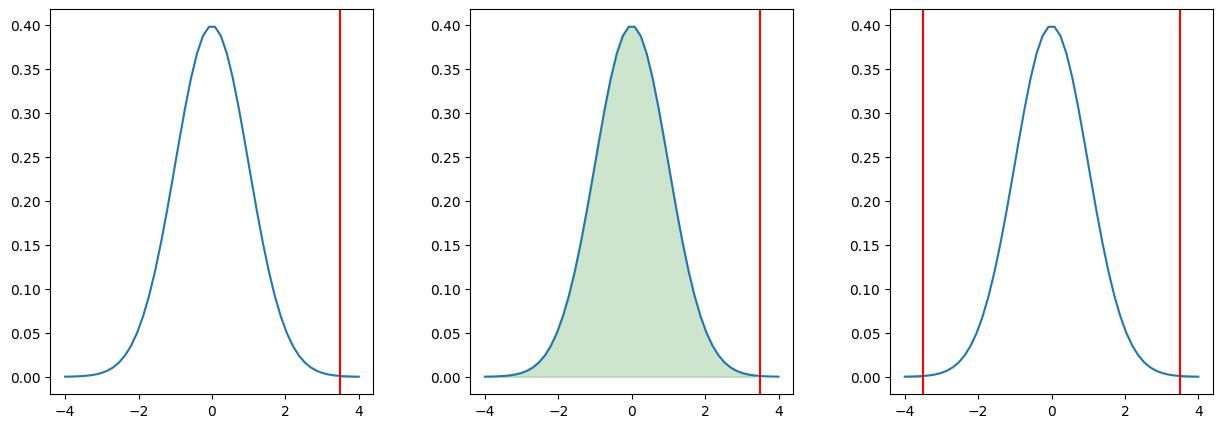

In [23]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
plt.subplots_adjust(wspace=0.3)
x=np.linspace(-4,4)
y=stats.norm.pdf(x,0,1)
ax[0].plot(x,y),ax[1].plot(x,y),ax[2].plot(x,y)
ax[0].axvline(x=z1, color='red')
ax[0].fill_between(x, 0, y, where=(x > z1), alpha=0.2,color='green')
ax[1].axvline(x=z1, color='red')
ax[1].fill_between(x, 0, y, where=(x < z1), alpha=0.2,color='green')
ax[2].axvline(z1,color='red')
ax[2].axvline(-z1,color='red')
ax[2].fill_between(x,0,y,where=(x>np.abs(z1)),color='green',alpha=0.2)
ax[2].fill_between(x,0,y,where=(x<(-np.abs(z1))),color='green',alpha=0.2)

In [24]:
#95% significance
if (p1 < 0.05):
    print("reject null hypothesis 1: therefore greater chance that sample mean will be greater than gold mean")
else:
    print("can't reject null hypothesis 1: therefore lesser chance that sample mean will be greater than gold mean")
if (p2 < 0.05):
    print("reject null hypothesis 2: therefore greater chance that sample mean will be smaller than gold mean")
else:
    print("can't reject null hypothesis 2: therefore lesser chance that sample mean will be smaller than gold mean")
if (p3 < 0.025):
    print("reject null hypothesis 3: therefore greater chance that sample mean will be either greater or smaller than gold mean")
else:
    print("can't reject null hypothesis 3: therefore lesser chance that sample mean will be either greater or smaller than gold mean")


reject null hypothesis 1: therefore greater chance that sample mean will be greater than gold mean
can't reject null hypothesis 2: therefore lesser chance that sample mean will be smaller than gold mean
reject null hypothesis 3: therefore greater chance that sample mean will be either greater or smaller than gold mean


two-sample

In [25]:
# one-sided__larger
z1, p1 = ztesting(
    x1=class_ages_1, x2=class_ages_2, value=0, alternative='larger')
# one-sided__smaller
z2, p2 = ztesting(
    x1=class_ages_1, x2=class_ages_2, value=0, alternative='smaller')
# two_sided
z3, p3 = ztesting(
    x1=class_ages_1, x2=class_ages_2, value=0, alternative="two-sided")

In [26]:
print(f"      z1:{z1} p1:{p1} \n\
      z2:{z2} p2 :{p2} \n\
      z3:{z3} p3 :{p3}")

      z1:-0.512014152437074 p1:0.6956794476185619 
      z2:-0.512014152437074 p2 :0.3043205523814381 
      z3:-0.512014152437074 p3 :0.6086411047628763


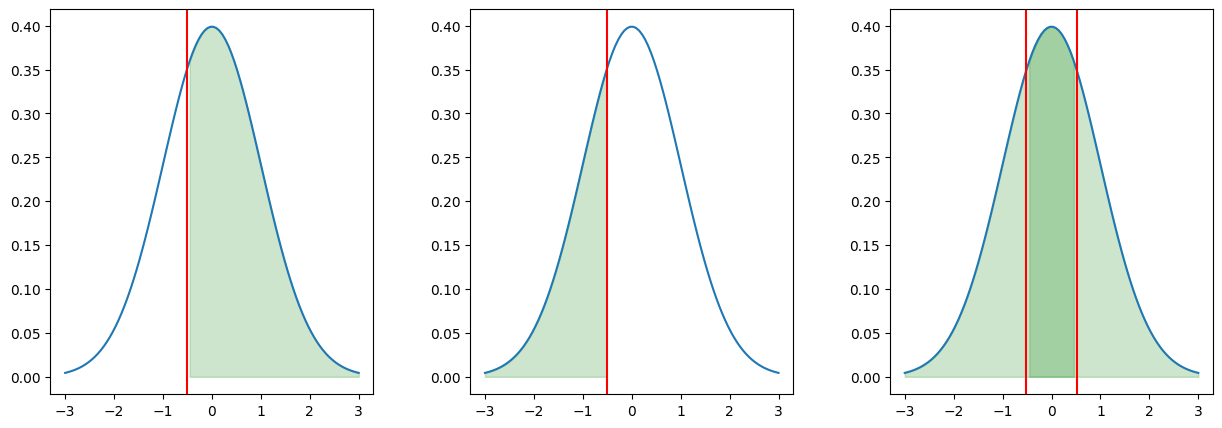

In [27]:
z1 = z1
fig,ax=plt.subplots(1,3,figsize=(15,5))
plt.subplots_adjust(wspace=0.3)
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x, loc=0, scale=1)
ax[0].plot(x, y)
ax[0].axvline(x=z1, color='red')
ax[0].fill_between(x, 0, y, where=(x > z1), alpha=0.2,color='green')
ax[1].plot(x, y)
ax[1].axvline(x=z1, color='red')
ax[1].fill_between(x, 0, y, where=(x < z1), alpha=0.2,color='green')
ax[2].plot(x, y)
ax[2].axvline(x=z1, color='red')
ax[2].axvline(x=-z1, color='red')
condition=((x>z1) | ( x<-z1))
ax[2].fill_between(x, 0, y, where=(x > z1), alpha=0.2,color='green')
ax[2].fill_between(x, 0, y, where=(x < -z1), alpha=0.2,color='green')
plt.show()

In [28]:
#95% significance
if (p1 < 0.05):
    print("reject null hypothesis 1: therefore greater chance that sample 1 mean will be greater than sample 2 mean")
else:
    print("can't reject null hypothesis 1: therefore lesser chance that sample 1 mean will be greater than sample 2 mean")
if (p2 < 0.05):
    print("reject null hypothesis 2: therefore greater chance that sample 1 mean will be smaller than sample 2 mean")
else:
    print("can't reject null hypothesis 2: therefore lesser chance that sample 1 mean will be smaller than sample 2 mean")
if (p3 < 0.025):
    print("reject null hypothesis 3: therefore greater chance that sample 1 mean will be either greater or smaller than sample 2 mean")
else:
    print("can't reject null hypothesis 3: therefore lesser chance that sample 1 mean will be either greater or smaller than sample 2 mean")

can't reject null hypothesis 1: therefore lesser chance that sample 1 mean will be greater than sample 2 mean
can't reject null hypothesis 2: therefore lesser chance that sample 1 mean will be smaller than sample 2 mean
can't reject null hypothesis 3: therefore lesser chance that sample 1 mean will be either greater or smaller than sample 2 mean
